# Summary

# Imports

In [61]:
#Here I import all the Libraries needed to run the project:

import numpy as np
#עבודה עם טבלאות
import pandas as pd
#גרפיקה
import matplotlib.pyplot as plt
#גרפיקה
import seaborn as sns
#כל הפלוט הולכים למסמך הזה
%matplotlib inline
#סיפריה עיקרית של למידת מכונה
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso , Ridge
from sklearn.ensemble import GradientBoostingRegressor
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error




#import warnings
#warnings.filterwarnings('ignore')

#Automated reports
# !pip install dataprep
# from dataprep.eda import create_report
# !pip install sweetviz
# import sweetviz as sv
# !pip install pandas_profiling
# from pandas_profiling import ProfileReport

In [2]:

# !pip install sweetviz
# import sweetviz as sv
# report = sv.analyze(df1)
# report.show_html()

# Loading Dataset

In [3]:
df=pd.read_csv('/content/file.csv')

# Exploration Basic Data


In [4]:
#df.head() is a method in pandas that returns the first 5 rows of the DataFrame by default.
#It’s a quick way to inspect the structure of  data and ensure it has been loaded correctly.
df.head()

Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  ...  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA  ...   
3    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA  ...   
4  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   

   Avg_Price  Delivery_Charges  Coupon_Status  GST      Date Offline_Spend  \
0     153.71               6.5           Used  0.1  1/1/2019        4500.0   
1     153.71               6.5           Used  0.1  1/1/2019        4500.0   
2     122.77               6.5       Not Used  0.1  1/1/2019        4500.0   
3      81.50               6.5        Clicked  0.1  1/1/2019        4500.0   
4     153.71               6.5        Clicked  0.1  1/1/2019        4500.0   

   Online_Spend  Month  Coupon_Code Discount_pct  
0        2424.5      1       ELEC10         10.0  
1        2424.5      1       ELEC10         10.0  
2        2424.5      1       ELEC10         10.0  
3        2424.5      1       ELEC10         10.0  
4        2424.5      1       ELEC10         10.0  

[5 rows x 21 columns]

In [5]:
#df.tail() is a method in pandas that returns the last 5 rows of the DataFrame by default.
# This is useful for inspecting the end of your dataset.
#   nan
df.tail()

Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
52950       52950         NaN    NaN      NaN            NaN             NaN   
52951       52951         NaN    NaN      NaN            NaN             NaN   
52952       52952         NaN    NaN      NaN            NaN             NaN   
52953       52953         NaN    NaN      NaN            NaN             NaN   
52954       52954         NaN    NaN      NaN            NaN             NaN   

      Transaction_Date Product_SKU Product_Description      Product_Category  \
52950              NaN         NaN                 NaN            Gift Cards   
52951              NaN         NaN                 NaN  Notebooks & Journals   
52952              NaN         NaN                 NaN               Android   
52953              NaN         NaN                 NaN               Android   
52954              NaN         NaN                 NaN               Android   

       ...  Avg_Price  Delivery_Charges  Coupon_Status GST  Date  \
52950  ...        NaN               NaN            NaN NaN   NaN   
52951  ...        NaN               NaN            NaN NaN   NaN   
52952  ...        NaN               NaN            NaN NaN   NaN   
52953  ...        NaN               NaN            NaN NaN   NaN   
52954  ...        NaN               NaN            NaN NaN   NaN   

      Offline_Spend  Online_Spend  Month  Coupon_Code Discount_pct  
52950           NaN           NaN     11         GC20         20.0  
52951           NaN           NaN     11         NJ20         20.0  
52952           NaN           NaN     10        AND10         10.0  
52953           NaN           NaN     11        AND20         20.0  
52954           NaN           NaN     12        AND30         30.0  

[5 rows x 21 columns]

In [6]:
#df.info() is a method in pandas that provides a concise summary of the DataFrame.
# It's one of the first steps to understand the structure and basic information about your dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [7]:
#df.describe() is a method in pandas that generates descriptive statistics for numerical columns in the DataFrame.
#It provides a summary of the central tendency, dispersion, and shape of the dataset's distribution.
#(.T), we present each column as a row, making it easier to interpret the summary statistics.
#Count: The number of non-null entries.
# Mean: The average value.
# Std (Standard Deviation): Measures the spread of the data (התפשטות הנתונים).
# Min: The smallest value in the column.
# 25%, 50%, 75%: The quartiles, representing the distribution of the data(התפלגות הנתונים).
# Max: The largest value in the column.
#

df.describe().T

count          mean           std       min       25%  \
Unnamed: 0        52955.0  26477.000000  15286.936089      0.00  13238.50   
CustomerID        52924.0  15346.709810   1766.556020  12346.00  13869.00   
Tenure_Months     52924.0     26.127995     13.478285      2.00     15.00   
Transaction_ID    52924.0  32409.825675   8648.668977  16679.00  25384.00   
Quantity          52924.0      4.497638     20.104711      1.00      1.00   
Avg_Price         52924.0     52.237646     64.006882      0.39      5.70   
Delivery_Charges  52924.0     10.517630     19.475613      0.00      6.00   
GST               52924.0      0.137462      0.045825      0.05      0.10   
Offline_Spend     52924.0   2830.914141    936.154247    500.00   2500.00   
Online_Spend      52924.0   1893.109119    807.014092    320.25   1252.63   
Month             52955.0      6.652800      3.333664      1.00      4.00   
Discount_pct      52555.0     19.953382      8.127108     10.00     10.00   

                       50%       75%       max  
Unnamed: 0        26477.00  39715.50  52954.00  
CustomerID        15311.00  16996.25  18283.00  
Tenure_Months        27.00     37.00     50.00  
Transaction_ID    32625.50  39126.25  48497.00  
Quantity              1.00      2.00    900.00  
Avg_Price            16.99    102.13    355.74  
Delivery_Charges      6.00      6.50    521.36  
GST                   0.18      0.18      0.18  
Offline_Spend      3000.00   3500.00   5000.00  
Online_Spend       1837.87   2425.35   4556.93  
Month                 7.00      9.00     12.00  
Discount_pct         20.00     30.00     30.00

In [8]:
# #descriptive statistics for the categorical (object-type) columns in the DataFrame.
# #Count: The number of non-null entries.
# Unique: The number of unique values.
# Top: The most frequent (or mode) value.
# Freq: The frequency of the top value.
df.describe(include='object').T

count unique  \
Gender               52924      2   
Location             52924      5   
Transaction_Date     52924    365   
Product_SKU          52924   1145   
Product_Description  52924    404   
Product_Category     52955     21   
Coupon_Status        52924      3   
Date                 52924    365   
Coupon_Code          52555     48   

                                                                   top   freq  
Gender                                                               F  33007  
Location                                                       Chicago  18380  
Transaction_Date                                            2019-11-27    335  
Product_SKU                                             GGOENEBJ079499   3511  
Product_Description  Nest Learning Thermostat 3rd Gen-USA - Stainle...   3511  
Product_Category                                               Apparel  18126  
Coupon_Status                                                  Clicked  26926  
Date                                                        11/27/2019    335  
Coupon_Code                                                     SALE20   6373

# Drop Unused Data

In [9]:
#emove specific columns, you streamline your dataset, focusing only on the relevant data
colums = ['Unnamed: 0','Transaction_Date', 'Transaction_ID', 'Product_SKU','Coupon_Code']
df.drop(colums,axis=1,inplace=True)
# axis = 1 במקומות שיש עמודה,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52955 non-null  object 
 6   Quantity             52924 non-null  float64
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
 10  GST                  52924 non-null  float64
 11  Date                 52924 non-null  object 
 12  Offline_Spend        52924 non-null  float64
 13  Online_Spend         52924 non-null  float64
 14  Month                52955 non-null  int64  
 15  Discount_pct         52555 non-null 

# Check Missing Data


In [10]:
#df.isnull().sum() command is used to identify missing values (null values) in each column of the DataFrame.
df.isnull().sum()

CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Discount_pct           400
dtype: int64

In [11]:
# remove incomplite records
df.dropna(inplace=True)
df.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Discount_pct           0
dtype: int64

In [12]:
# new shape of the data
df.shape

(52524, 16)

# Checkin repeated rows

In [13]:
#Returns a boolean Series where True indicates a duplicate row (excluding the first occurrence)
# and False indicates a unique row.

df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(48672, 16)

# Change Object to Categorical

In [14]:
#Converting columns to the category data type helps reduce memory usage and can improve performance
#for large datasets with repeated text values.

df.info()
obj_colums = ['Gender', 'Location', 'Product_Description', 'Product_Category','Coupon_Status']
df[obj_colums] = df[obj_colums].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48672 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           48672 non-null  float64
 1   Gender               48672 non-null  object 
 2   Location             48672 non-null  object 
 3   Tenure_Months        48672 non-null  float64
 4   Product_Description  48672 non-null  object 
 5   Product_Category     48672 non-null  object 
 6   Quantity             48672 non-null  float64
 7   Avg_Price            48672 non-null  float64
 8   Delivery_Charges     48672 non-null  float64
 9   Coupon_Status        48672 non-null  object 
 10  GST                  48672 non-null  float64
 11  Date                 48672 non-null  object 
 12  Offline_Spend        48672 non-null  float64
 13  Online_Spend         48672 non-null  float64
 14  Month                48672 non-null  int64  
 15  Discount_pct         48672 non-null  floa

# Date Formaiting

In [15]:
# A pandas function that converts a column or series containing date information in string format into a datetime object,
# which allows for easier manipulation and analysis of dates.
df.info()
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48672 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerID           48672 non-null  float64 
 1   Gender               48672 non-null  category
 2   Location             48672 non-null  category
 3   Tenure_Months        48672 non-null  float64 
 4   Product_Description  48672 non-null  category
 5   Product_Category     48672 non-null  category
 6   Quantity             48672 non-null  float64 
 7   Avg_Price            48672 non-null  float64 
 8   Delivery_Charges     48672 non-null  float64 
 9   Coupon_Status        48672 non-null  category
 10  GST                  48672 non-null  float64 
 11  Date                 48672 non-null  object  
 12  Offline_Spend        48672 non-null  float64 
 13  Online_Spend         48672 non-null  float64 
 14  Month                48672 non-null  int64   
 15  Discount_pct         486

# Export Clean Data To Parquet Format

In [16]:
#Saving to Parquet: Use df.to_parquet() to save DataFrames in a columnar format that is efficient for storage and processing,
# particularly with large datasets and big data frameworks.
#Saving to Pickle: Use df.to_pickle() to serialize and save DataFrames in a binary format
# that is convenient for Python-specific applications.

df.to_parquet('/content/file_clean.pqt')
df.to_pickle('/content/file_clean.pkl')

In [17]:
#This command reads the Parquet file located at the specified path and loads it into a new DataFrame named df1
df1 = pd.read_parquet('/content/file_clean.pqt')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48672 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           48672 non-null  float64       
 1   Gender               48672 non-null  category      
 2   Location             48672 non-null  category      
 3   Tenure_Months        48672 non-null  float64       
 4   Product_Description  48672 non-null  category      
 5   Product_Category     48672 non-null  category      
 6   Quantity             48672 non-null  float64       
 7   Avg_Price            48672 non-null  float64       
 8   Delivery_Charges     48672 non-null  float64       
 9   Coupon_Status        48672 non-null  category      
 10  GST                  48672 non-null  float64       
 11  Date                 48672 non-null  datetime64[ns]
 12  Offline_Spend        48672 non-null  float64       
 13  Online_Spend         48672 non-null 

# Data Protocol

In [18]:

# Type of valaues
#This command exports the data types of each column in the DataFrame df1 to an Excel file.
df1.dtypes.to_excel("file_clean.xlsx",
             sheet_name='data_type')
# Maximum valaues
#This command exports the maximum values of all numeric columns in df1 to an Excel file.
df1.select_dtypes(include='number').max().to_excel("max_file_clean.xlsx",
             sheet_name='max_numeric')

# Minimum Values
#This command exports the median values of numeric columns in df1 to an Excel file.
df1.select_dtypes(include='number').median().to_excel("min_file_clean.xlsx",
             sheet_name='min_numeric')
# Missing Values
#his command exports the count of missing values in each column to an Excel file.
df1.isnull().sum(axis=0).to_excel("NA_file_clean.xlsx",
             sheet_name='NA')

# exporting results to the protocol
#This command exports the count of unique values in each column to an Excel file.
df1.nunique().to_excel("unique_file_clean.xlsx",
             sheet_name='unique')

# Descriptive Statistics


In [19]:
#This command installs the ydata_profiling library, which is used for generating detailed profiling reports of data.
!pip install ydata_profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df1, title="Profiling Report", explorative=False)
# explorative=False due to too big report
profile

#HIGH CARDINALITY: This term indicates that the column contains a large number of unique values relative to the size of the dataset.
#In this case, the column has high cardinality with 395 distinct values.



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=80b480945496fec8fdd8d0e5d7e510be099a1d985ea1cc7f309a13e8052a07df
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
profile.to_file("output.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Target Value

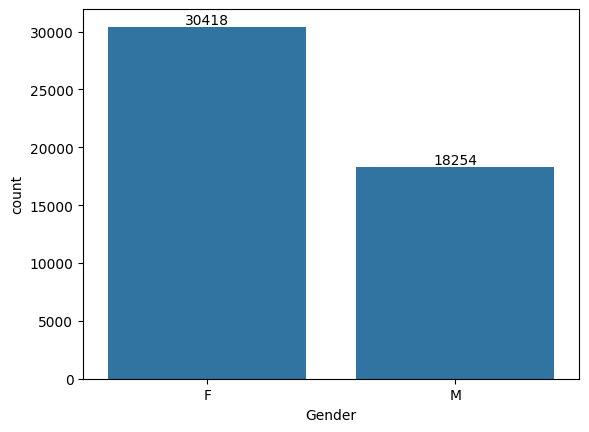

In [21]:
#Use sns.countplot() to visualize the distribution of categorical data, such as the Gender column.
ax= sns.countplot(data=df1,x='Gender')
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

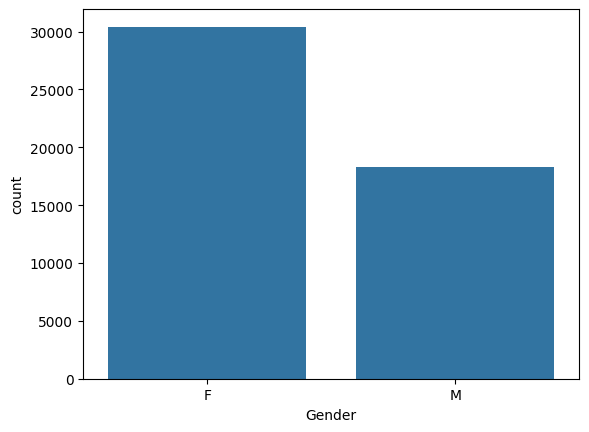

In [22]:
sns.countplot(x='Gender', data=df1)

# Skewness

In [23]:
#החשיבות של התייחסות לעיוות כדי להבטיח תוצאות מדויקות ואמינות בניתוח נתונים ומידול.
#עד כמה שההתפלגות לא סימטרית, כמה זנב

def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default
pd.DataFrame(df1.select_dtypes(include='number').skew(),columns=['skewness']).sort_values(by='skewness', ascending=False)

#GST (-0.40):מוטה לערכים גבוהים יותר, מה שמצביע על כך שרוב סכומי ה-GST גבוהים יותר עם פחות סכומים נמוכים יותר. gst מוטה לרעה בינונית. ההתפלגות של
#Offline_Spend (-0.31): מוטה מעט לרעה. זה מצביע על כך שרוב ערכי ההוצאות הלא מקוונות גבוהים יותר, כאשר כמה ערכים נמוכים יותר מטים את ההתפלגות שמאלה
#Discount_pct (0.01): קרוב מאוד לאפס הטיה, מה שמצביע על כך שהתפלגות אחוז ההנחה היא סימטרית בקירוב.
#מזהה לקוח (-0.02): הפצה כמעט סימטרית של מזהי לקוחות.
#קביעות_חודשי (-0.07): התפלגות כמעט סימטרית של קביעות הלקוחות בחודשים.
#חודש (-0.08): קרוב מאוד להתפלגות סימטרית של חודשים.
#Online_Spend (0.45): מוטה מעט באופן חיובי. ההתפלגות קרובה יחסית לנורמה אך עם הטיה קלה ימינה.
#ליד אפס עיוות:
#Avg_Price (1.74): מוטה באופן מתון חיובי. רוב המחירים הממוצעים הם בצד התחתון, עם כמה מקרים של מחירים גבוהים.
#תפוצה כמעט נורמלית:
#דמי משלוח (11.74): מוטה מאוד. זה מצביע על כך שרוב דמי המשלוח נמוכים, עם כמה מקרים של חיובים גבוהים מאוד.
#עיוות חיובית בינונית:
#כמות (18.45): מוטה בצורה חיובית ביותר. התפלגות הכמות מוטה מאוד ימינה, מה שמצביע על כך שיש הרבה ערכים קטנים עם כמה ערכים גבוהים מאוד.

skewness
Quantity          18.453951
Delivery_Charges  11.738199
Avg_Price          1.740013
Online_Spend       0.453608
Discount_pct       0.005529
CustomerID        -0.022580
Tenure_Months     -0.073686
Month             -0.078159
Offline_Spend     -0.312492
GST               -0.396332

# Plot Gender Pie chart

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48672 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           48672 non-null  float64       
 1   Gender               48672 non-null  category      
 2   Location             48672 non-null  category      
 3   Tenure_Months        48672 non-null  float64       
 4   Product_Description  48672 non-null  category      
 5   Product_Category     48672 non-null  category      
 6   Quantity             48672 non-null  float64       
 7   Avg_Price            48672 non-null  float64       
 8   Delivery_Charges     48672 non-null  float64       
 9   Coupon_Status        48672 non-null  category      
 10  GST                  48672 non-null  float64       
 11  Date                 48672 non-null  datetime64[ns]
 12  Offline_Spend        48672 non-null  float64       
 13  Online_Spend         48672 non-null 

<Axes: ylabel='count'>

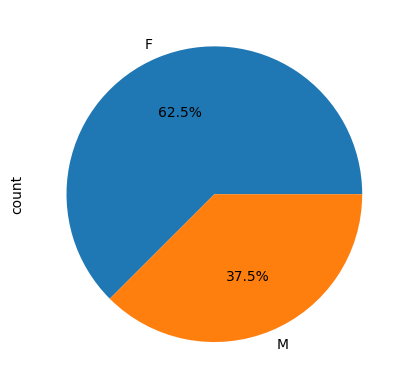

In [25]:
#כמות נשים לעומת גברים בפאי פלוט
df1.Gender.value_counts().plot(kind='pie',autopct='%1.1f%%')

#Female spend nearly 2 times higher than Males


<Axes: ylabel='count'>

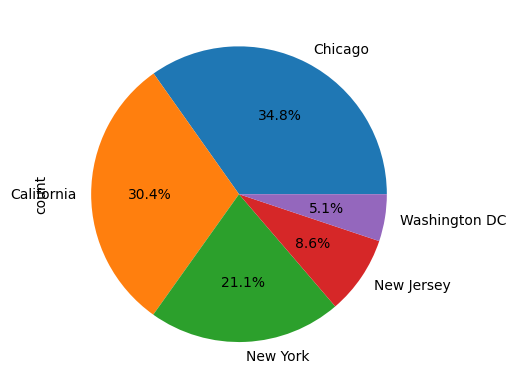

In [26]:
#ייצוג בפאי פלוט של הערים מהם מגיעים הקונים
df1.Location.value_counts().plot(kind='pie',autopct='%1.1f%%')
#Thus, the most frequent cities spents high amount in total

<Axes: ylabel='count'>

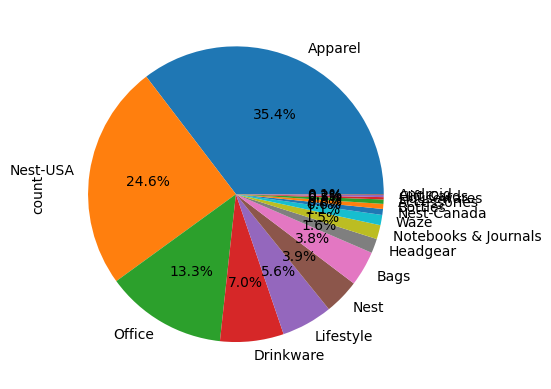

In [27]:
#ייצוג בפאי פלוט של הקטגוריות קנייה של הצרכנים
df1.Product_Category.value_counts().plot(kind='pie',autopct='%1.1f%%')

# Plot Numeric Data

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Tenure_Months'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Avg_Price'}>,
        <Axes: title={'center': 'Delivery_Charges'}>,
        <Axes: title={'center': 'GST'}>],
       [<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Offline_Spend'}>,
        <Axes: title={'center': 'Online_Spend'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Discount_pct'}>, <Axes: >]], dtype=object)

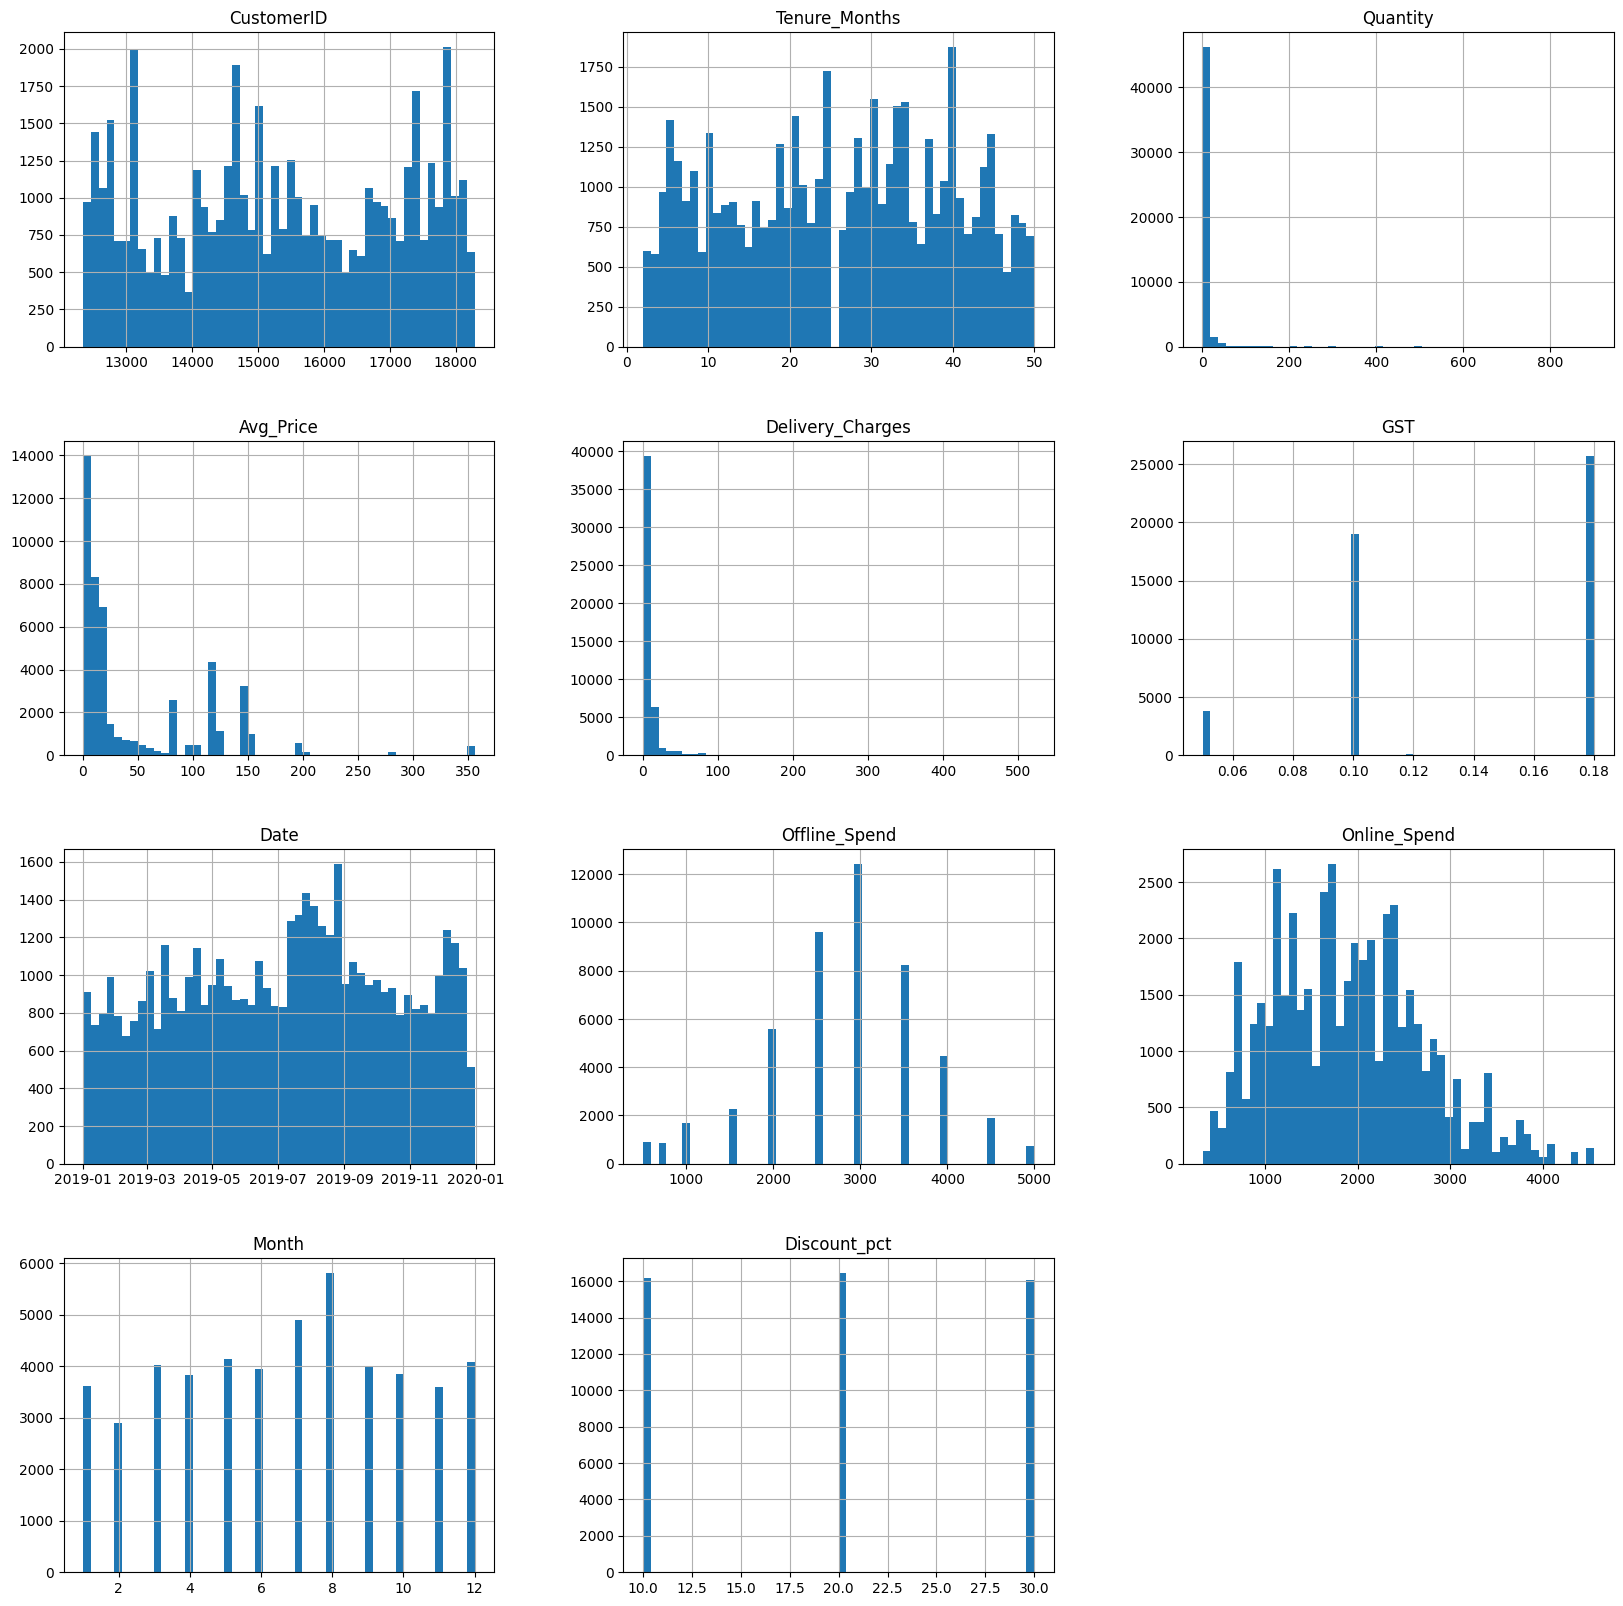

In [28]:
#היסטוגרמות הן כלי בסיסי לחקר נתונים, המספקות תובנות לגבי התפלגות ומאפיינים של נתונים מספריים.
# הדגש כיצד ניתן להשתמש בהם כדי לזהות מגמות, דפוסים ובעיות פוטנציאליות בנתונים.

df.hist(figsize=(20,20),bins=50)

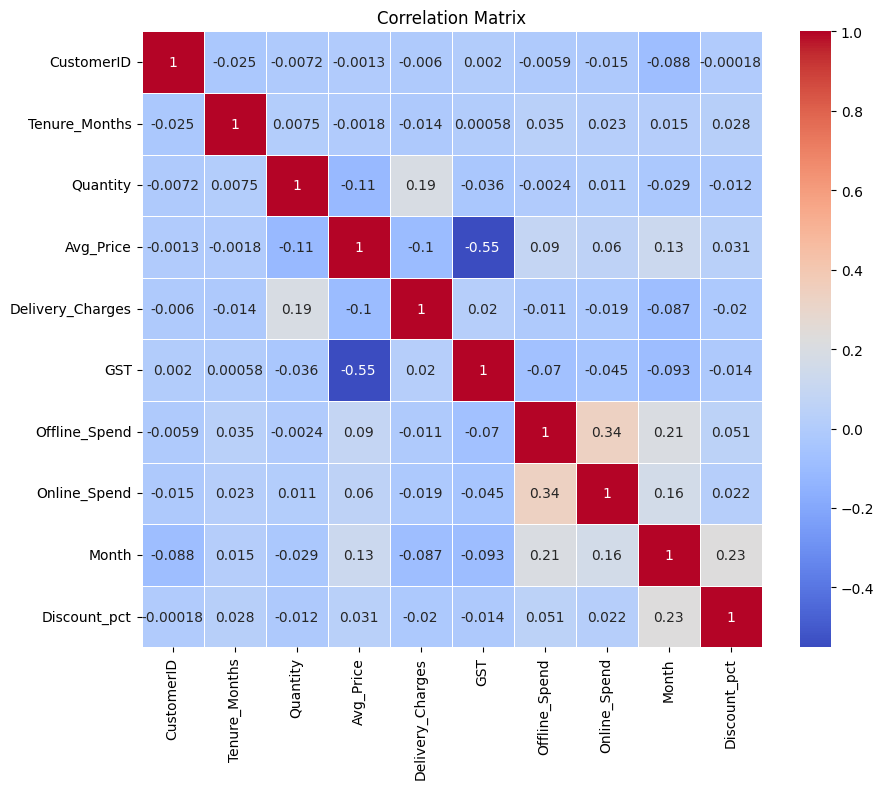

In [29]:
#show correlathion metrix for numerical data only
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#פירוש מתאמים: מקדמי המתאם נעים בין -1 ל-1.
#ערכים קרובים ל-1 או -1 מצביעים על מתאמים חזקים
# בעוד שערכים קרובים ל-0 מצביעים על מתאמים חלשים.

# Box Plot

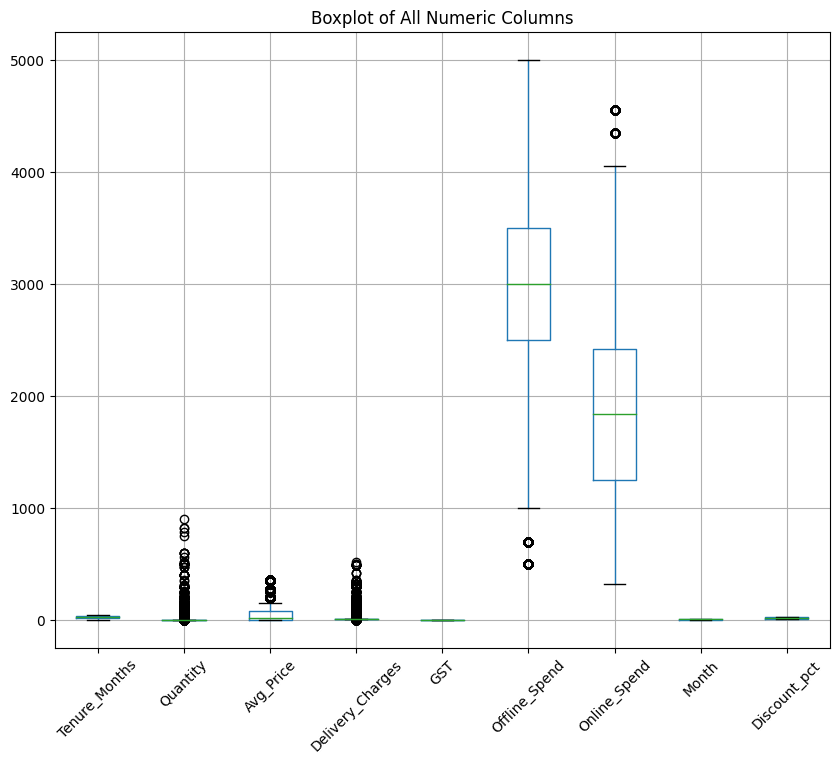

In [30]:

numeric_df = df1.select_dtypes(include='number').drop(columns=['CustomerID'])

# Create a boxplot for each numeric column
plt.figure(figsize=(10, 8))
numeric_df.boxplot()
plt.title('Boxplot of All Numeric Columns')
plt.xticks(rotation=45)
plt.show()

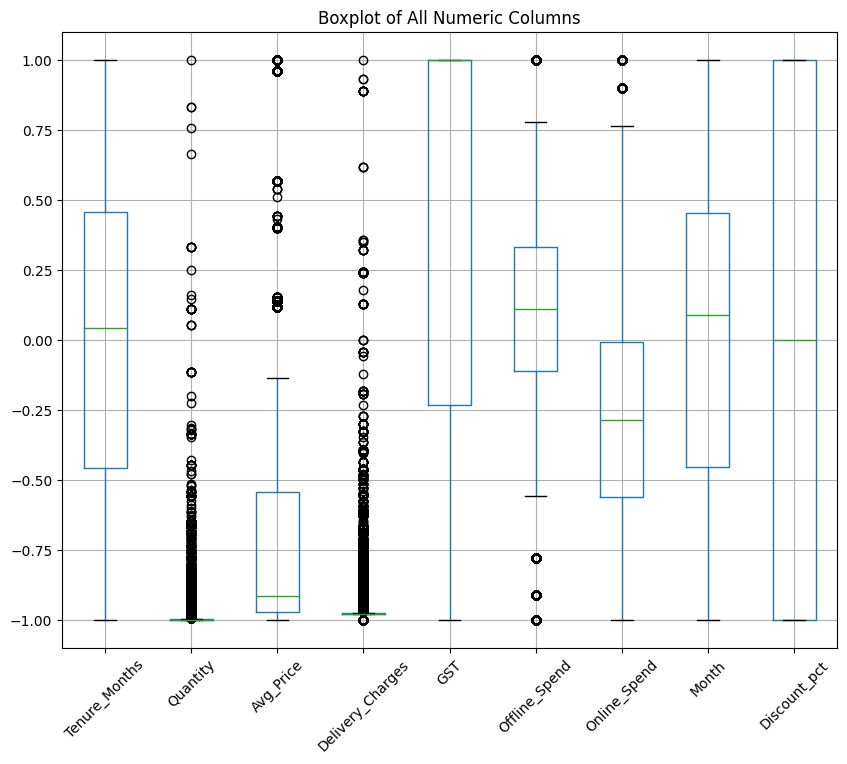

In [31]:


from sklearn.preprocessing import MinMaxScaler
numeric_df = df1.select_dtypes(include='number').drop(columns=['CustomerID'])
# Initialize MinMaxScaler with the feature range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
# Fit and transform the numeric data
normalized_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Create a boxplot for each numeric column
plt.figure(figsize=(10, 8))
normalized_df.boxplot()
plt.title('Boxplot of All Numeric Columns')
plt.xticks(rotation=45)
plt.show()

# IQR

In [32]:
df1.describe().T

count                           mean                  min  \
CustomerID        48672.0                   15335.558391              12346.0   
Tenure_Months     48672.0                       26.16829                  2.0   
Quantity          48672.0                       4.688178                  1.0   
Avg_Price         48672.0                      49.272918                 0.39   
Delivery_Charges  48672.0                       10.65196                  0.0   
GST               48672.0                       0.138463                 0.05   
Date                48672  2019-07-06 11:59:33.372781056  2019-01-01 00:00:00   
Offline_Spend     48672.0                     2825.49926                500.0   
Online_Spend      48672.0                    1892.969416               320.25   
Month             48672.0                       6.674741                  1.0   
Discount_pct      48672.0                      19.969798                 10.0   

                                  25%                  50%  \
CustomerID                    13846.0              15311.0   
Tenure_Months                    15.0                 27.0   
Quantity                          1.0                  1.0   
Avg_Price                        5.25                15.99   
Delivery_Charges                  6.0                  6.0   
GST                               0.1                 0.18   
Date              2019-04-13 00:00:00  2019-07-14 00:00:00   
Offline_Spend                  2500.0               3000.0   
Online_Spend                  1252.63              1837.87   
Month                             4.0                  7.0   
Discount_pct                     10.0                 20.0   

                                  75%                  max          std  
CustomerID                    16955.0              18283.0  1768.006302  
Tenure_Months                    37.0                 50.0    13.480772  
Quantity                          2.0                900.0    20.870532  
Avg_Price                        81.5               355.74    62.420397  
Delivery_Charges                  6.5               521.36    19.707664  
GST                              0.18                 0.18     0.045816  
Date              2019-09-26 00:00:00  2019-12-31 00:00:00          NaN  
Offline_Spend                  3500.0               5000.0    932.67108  
Online_Spend                  2424.97              4556.93   804.188298  
Month                             9.0                 12.0     3.307893  
Discount_pct                     30.0                 30.0     8.136383

# Extreme Points

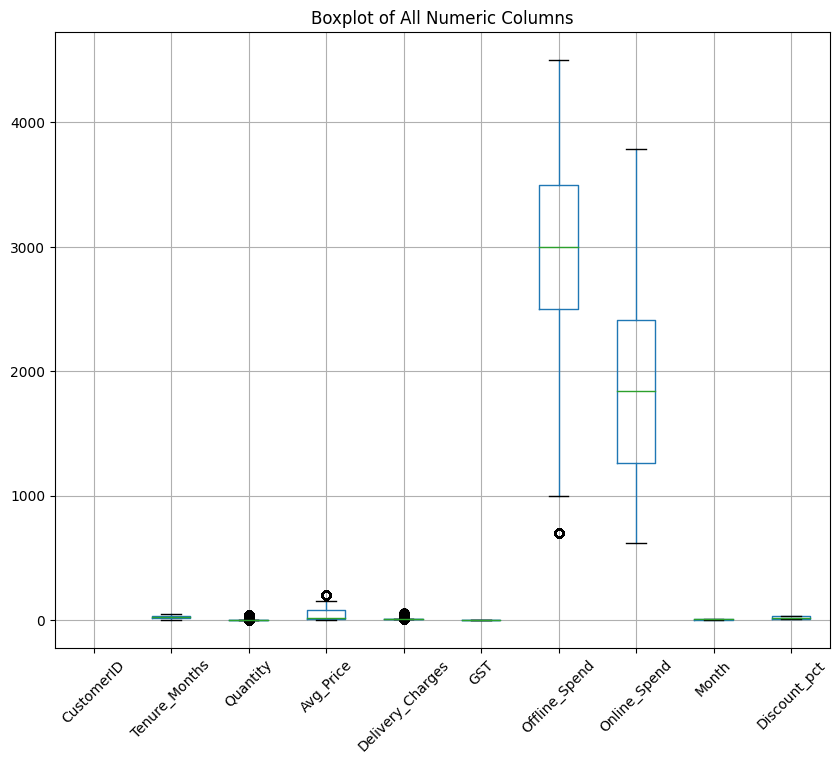

In [33]:


# Calculate the 2st and 98th percentiles for each numeric column
lower_bound = numeric_df.quantile(0.02)
upper_bound = numeric_df.quantile(0.98)

# Filter the DataFrame to include only data within the 1st and 99th percentiles
filtered_df = df[(numeric_df >= lower_bound) & (numeric_df <= upper_bound)]

# Create a boxplot for each numeric column
plt.figure(figsize=(10, 8))
filtered_df.boxplot()
plt.title('Boxplot of All Numeric Columns')
plt.xticks(rotation=45)
plt.show()


In [34]:
filtered_df = df[(numeric_df >= lower_bound) & (numeric_df <= upper_bound)]
filtered_df

CustomerID Gender Location  Tenure_Months Product_Description  \
0             NaN    NaN      NaN           12.0                 NaN   
2             NaN    NaN      NaN           12.0                 NaN   
3             NaN    NaN      NaN           12.0                 NaN   
4             NaN    NaN      NaN           12.0                 NaN   
6             NaN    NaN      NaN           12.0                 NaN   
...           ...    ...      ...            ...                 ...   
52919         NaN    NaN      NaN            8.0                 NaN   
52920         NaN    NaN      NaN           34.0                 NaN   
52921         NaN    NaN      NaN           15.0                 NaN   
52922         NaN    NaN      NaN           15.0                 NaN   
52923         NaN    NaN      NaN            8.0                 NaN   

      Product_Category  Quantity  Avg_Price  Delivery_Charges Coupon_Status  \
0                  NaN       1.0     153.71               6.5           NaN   
2                  NaN       2.0     122.77               6.5           NaN   
3                  NaN       1.0      81.50               6.5           NaN   
4                  NaN       1.0     153.71               6.5           NaN   
6                  NaN       2.0     153.71               6.5           NaN   
...                ...       ...        ...               ...           ...   
52919              NaN       1.0        NaN               NaN           NaN   
52920              NaN       1.0      25.00               NaN           NaN   
52921              NaN       1.0      10.80               6.0           NaN   
52922              NaN       1.0       9.60               6.0           NaN   
52923              NaN       1.0       5.59               6.5           NaN   

        GST Date  Offline_Spend  Online_Spend  Month  Discount_pct  
0      0.10  NaT         4500.0       2424.50      1          10.0  
2      0.10  NaT         4500.0       2424.50      1          10.0  
3      0.10  NaT         4500.0       2424.50      1          10.0  
4      0.10  NaT         4500.0       2424.50      1          10.0  
6      0.10  NaT         4500.0       2424.50      1          10.0  
...     ...  ...            ...           ...    ...           ...  
52919  0.05  NaT         2500.0       1294.22      3          30.0  
52920  0.05  NaT         2000.0       1066.12      3          30.0  
52921  0.05  NaT         3000.0       2230.76     10          10.0  
52922  0.05  NaT         3000.0       2230.76     10          10.0  
52923  0.05  NaT         3000.0       2230.76     10          10.0  

[48672 rows x 16 columns]

# KNN

In [35]:
df1.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Discount_pct'],
      dtype='object')

In [36]:
#df1.columns
selected_columns = ['Gender', 'Location', 'Tenure_Months','Product_Category','Quantity', 'Avg_Price', 'Delivery_Charges','Coupon_Status','GST','Offline_Spend' ,'Online_Spend','Month','Discount_pct']
#sel_df= df1.loc[:, selected_columns]
#df1.reset_index()
sel_df = df1[selected_columns]
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48672 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            48672 non-null  category
 1   Location          48672 non-null  category
 2   Tenure_Months     48672 non-null  float64 
 3   Product_Category  48672 non-null  category
 4   Quantity          48672 non-null  float64 
 5   Avg_Price         48672 non-null  float64 
 6   Delivery_Charges  48672 non-null  float64 
 7   Coupon_Status     48672 non-null  category
 8   GST               48672 non-null  float64 
 9   Offline_Spend     48672 non-null  float64 
 10  Online_Spend      48672 non-null  float64 
 11  Month             48672 non-null  int64   
 12  Discount_pct      48672 non-null  float64 
dtypes: category(4), float64(8), int64(1)
memory usage: 4.9 MB


In [37]:

# Identify categorical columns
categorical_columns = sel_df.select_dtypes(include=['object','category']).columns
print(categorical_columns)
# Initialize the one-hot encoder
ohe = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

# Apply one-hot encoding to all categorical columns
encoded_data = ohe.fit_transform(sel_df[categorical_columns])

# Convert the encoded data to a DataFrame and concatenate it with the original DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([sel_df.drop(categorical_columns, axis=1), encoded_df], axis=1)
df_encoded.info()

df_cleaned = df_encoded.dropna()
df_cleaned.info()



Index(['Gender', 'Location', 'Product_Category', 'Coupon_Status'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
Index: 52529 entries, 0 to 48670
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure_Months                          48672 non-null  float64
 1   Quantity                               48672 non-null  float64
 2   Avg_Price                              48672 non-null  float64
 3   Delivery_Charges                       48672 non-null  float64
 4   GST                                    48672 non-null  float64
 5   Offline_Spend                          48672 non-null  float64
 6   Online_Spend                           48672 non-null  float64
 7   Month                                  48672 non-null  float64
 8   Discount_pct                           48672 non-null  float64
 9   Gender_M                               48672 non-null  float64
 10  Location_Chicago                       48672 non-null  float64
 11  Locatio

### Common Train Data

In [38]:

X = df_cleaned.drop('Avg_Price', axis=1)
y = df_cleaned['Avg_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
mse_dict = {}
for n in range(1, 30):
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  mse_dict[n] = mse
  print("Mean Squared Error:", mse)


opt_n = min(mse_dict, key=mse_dict.get)
print(f"The key with the minimum value is '{opt_n}' with a value of {mse_dict[opt_n]}.")





Mean Squared Error: 2071.9819781323217
Mean Squared Error: 1748.3226159907397
Mean Squared Error: 1647.4451680290576
Mean Squared Error: 1626.0478600363997
Mean Squared Error: 1628.7611414352339
Mean Squared Error: 1621.8222497951456
Mean Squared Error: 1619.439913476264
Mean Squared Error: 1628.9928604143422
Mean Squared Error: 1637.8207081626383
Mean Squared Error: 1643.2275074366844
Mean Squared Error: 1658.8315077055997
Mean Squared Error: 1670.304804845228
Mean Squared Error: 1684.3412470723492
Mean Squared Error: 1696.510921759581
Mean Squared Error: 1701.5116650665577
Mean Squared Error: 1710.9117687220203
Mean Squared Error: 1722.1117017467427
Mean Squared Error: 1727.3126363181696
Mean Squared Error: 1733.6215079351155
Mean Squared Error: 1741.6081742330136
Mean Squared Error: 1745.7853942416075
Mean Squared Error: 1752.9523153315097
Mean Squared Error: 1764.428320623538
Mean Squared Error: 1774.3368798306424
Mean Squared Error: 1780.694299205016
Mean Squared Error: 1787.27330

In [40]:

# Serialize the model to a file using pickle
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)


# LASSO Regression

Mean Squared Error: 2387.971308453469
Mean Squared Error: 2387.966103466609
Mean Squared Error: 2387.9575619114157
Mean Squared Error: 2387.9491873428947
Mean Squared Error: 2387.9409798198976
Mean Squared Error: 2387.895234235223
Mean Squared Error: 2387.8323322212823
Mean Squared Error: 2387.786102095996
Mean Squared Error: 2387.756536359279
Mean Squared Error: 2387.776098222882
Mean Squared Error: 2388.4913640630193
Mean Squared Error: 2389.544330814651
Mean Squared Error: 2389.745307662059
Mean Squared Error: 2391.3148316775037
Mean Squared Error: 2393.5731396590195
Mean Squared Error: 2397.72922527893
The key with the minimum value is '0.01' with a value of {'mse': 2387.756536359279, 'coefficients': array([ -0.25631684,  -7.05734116,  -4.05547782, -34.08222565,
         2.20058381,   1.45545049,   3.99616478,   0.85106077,
         0.40640545,  -0.21913018,   0.87197423,  -0.78093617,
         0.85413945,   1.17727047,  13.42671563,   8.1174158 ,
         0.25214771,   9.34262699,

Text(0.5, 1.0, 'Mean Squared Error vs. Alpha')

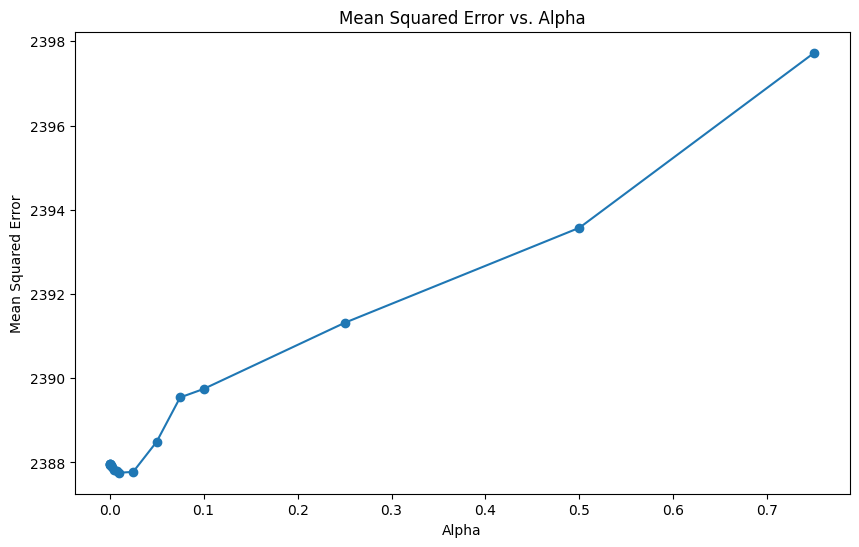

In [41]:
# Initializing the Lasso model with a specific alpha value
mse_dict = {}
# Adding ranges converted to floats
alphas = [0.0001, 0.00025, 0.0005, 0.00075]
alphas += [0.001, 0.0025, 0.005, 0.0075]
alphas += [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75]

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_scaled, y_train)
  y_pred = lasso.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  mse_dict[alpha] = {'mse': mse, 'coefficients': lasso.coef_}
  print("Mean Squared Error:", mse)

opt_alpha = min(mse_dict, key=lambda x: mse_dict[x]['mse'])
print(f"The key with the minimum value is '{opt_alpha}' with a value of {mse_dict[opt_alpha]}.")
print(f"The coefficients are {mse_dict[opt_alpha]['coefficients']}.")

#plot mse
plt.figure(figsize=(10, 6))
plt.plot(list(mse_dict.keys()), [mse_dict[alpha]['mse'] for alpha in mse_dict], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha')

In [42]:
alpha = 0.75
print(f"The coefficients are {mse_dict[alpha]['coefficients']}.")
print(f"The num of zero coefficients are ",np.count_nonzero(mse_dict[alpha]['coefficients']))
#מאפסים בלאסו, ככל שאלפה יותר גדול ככה הפיצרים מתאפסים

The coefficients are [ -0.          -6.54926244  -3.49752362 -33.30175179   1.71970659
   0.84348643   3.46289041   0.15190658   0.          -0.
   0.23736957  -0.19426683   0.15218381   0.          -0.
   2.02176183  -1.0954818    1.38388095   0.18856614   1.72930232
  -0.48686431   3.26067221  -1.4466315    0.          -1.4834408
  -0.9938438    0.31914105  -0.          -0.           0.        ].
The num of zero coefficients are  21


# Ridge Regreshion

Mean Squared Error: 2387.974810642408
Mean Squared Error: 2387.974809127882
Mean Squared Error: 2387.9748066036846
Mean Squared Error: 2387.974804079504
Mean Squared Error: 2387.97480155534
Mean Squared Error: 2387.9747864107044
Mean Squared Error: 2387.9747611709786
Mean Squared Error: 2387.974735932917
Mean Squared Error: 2387.9747106965206
Mean Squared Error: 2387.9745593130965
Mean Squared Error: 2387.9743071405123
Mean Squared Error: 2387.974055134253
Mean Squared Error: 2387.9738032942255
Mean Squared Error: 2387.9722957398535
Mean Squared Error: 2387.969796387245
Mean Squared Error: 2387.9673135037297
Mean Squared Error: 2387.96484699931
Mean Squared Error: 2387.96239678453
Mean Squared Error: 2387.959962770469
Mean Squared Error: 2387.9575448687406
Mean Squared Error: 2387.955142991488
Mean Squared Error: 2387.9527570513787
Mean Squared Error: 2387.9503869616033
Mean Squared Error: 2387.9480326358703
The key with the minimum value is '2.75' with a value of {'mse': 2387.94803263

Text(0.5, 1.0, 'Mean Squared Error vs. Alpha')

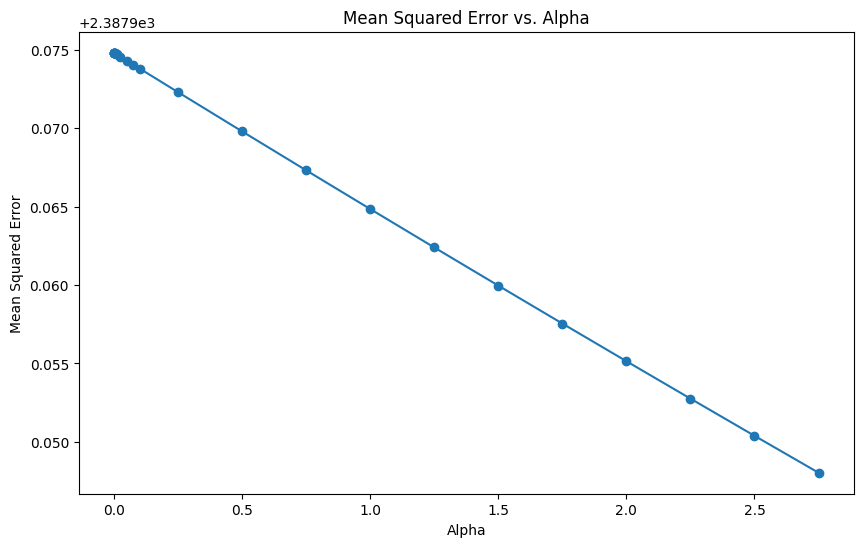

In [43]:
# Initializing the Lasso model with a specific alpha value
mse_dict = {}
# Adding ranges converted to floats
alphas = [0.0001, 0.00025, 0.0005, 0.00075]
alphas += [0.001, 0.0025, 0.005, 0.0075]
alphas += [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75]
alphas += [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75]
#alphas += [float(x) for x in range(1, 10)]
#alphas += [float(x) for x in range(10, 100, 10)]

#grid search of optimal alpha
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train_scaled, y_train)
  y_pred = ridge.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  mse_dict[alpha] = {'mse': mse, 'coefficients': ridge.coef_}
  print("Mean Squared Error:", mse)

opt_alpha = min(mse_dict, key=lambda x: mse_dict[x]['mse'])
print(f"The key with the minimum value is '{opt_alpha}' with a value of {mse_dict[opt_alpha]}.")
#print(f"The coefficients are {mse_dict[opt_alpha]['coefficients']}.")

#plot mse
plt.figure(figsize=(10, 6))
plt.plot(list(mse_dict.keys()), [mse_dict[alpha]['mse'] for alpha in mse_dict], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha')

# Gradient Boosting

In [60]:

# Initializing the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss="squared_error",n_estimators=500 ,subsample=0.5, learning_rate=0.2, max_depth=4, random_state=42)
#learning_rate= 0.1,0.2 max_depth=3-6

# Fitting the model
gbr.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = gbr.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Assuming you have y_test and y_pred from your model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")

# Checking feature importance
print(f"Feature Importances: {gbr.feature_importances_}")

#def __init__(*, loss='squared_error',
#  learning_rate=0.1,
#   n_estimators=100,
#    subsample=0.5,
#     min_samples_split=2,
# min_samples_leaf=1,
# max_depth=3,
#          max_leaf_nodes=None,


Mean Squared Error: 1076.9232765061636
Mean Absolute Error: 20.625128477088253
Root Mean Square Error: 32.81650920658935
Feature Importances: [4.39307223e-02 1.37281022e-01 4.51579608e-02 4.39767740e-01
 2.15278822e-02 7.24208383e-02 1.15626223e-01 1.26791834e-02
 5.51402483e-03 6.33525656e-03 5.07142214e-03 5.11637632e-03
 5.28361510e-03 3.52051020e-04 1.74539311e-02 6.89324764e-03
 8.85273231e-04 7.68213453e-03 4.12485821e-04 1.66609476e-03
 7.19286073e-04 6.36900667e-03 2.53476959e-03 1.00353150e-03
 1.42904437e-02 2.15334888e-03 9.48035621e-03 1.59699187e-03
 6.45225248e-03 4.34252755e-03]


Feature ranking:
1. feature 3 (0.486158)
2. feature 1 (0.171856)
3. feature 6 (0.157991)
4. feature 2 (0.034255)
5. feature 5 (0.024109)
6. feature 24 (0.020427)
7. feature 14 (0.019856)
8. feature 7 (0.018074)
9. feature 4 (0.011486)
10. feature 26 (0.010136)
11. feature 0 (0.009004)
12. feature 21 (0.007446)
13. feature 17 (0.004444)
14. feature 15 (0.003636)
15. feature 27 (0.002560)
16. feature 25 (0.002430)
17. feature 11 (0.002136)
18. feature 9 (0.001826)
19. feature 12 (0.001734)
20. feature 22 (0.001612)
21. feature 19 (0.001487)
22. feature 29 (0.001376)
23. feature 8 (0.001296)
24. feature 20 (0.001125)
25. feature 16 (0.000983)
26. feature 10 (0.000854)
27. feature 23 (0.000595)
28. feature 28 (0.000528)
29. feature 13 (0.000347)
30. feature 18 (0.000234)


(-1.0, 30.0)

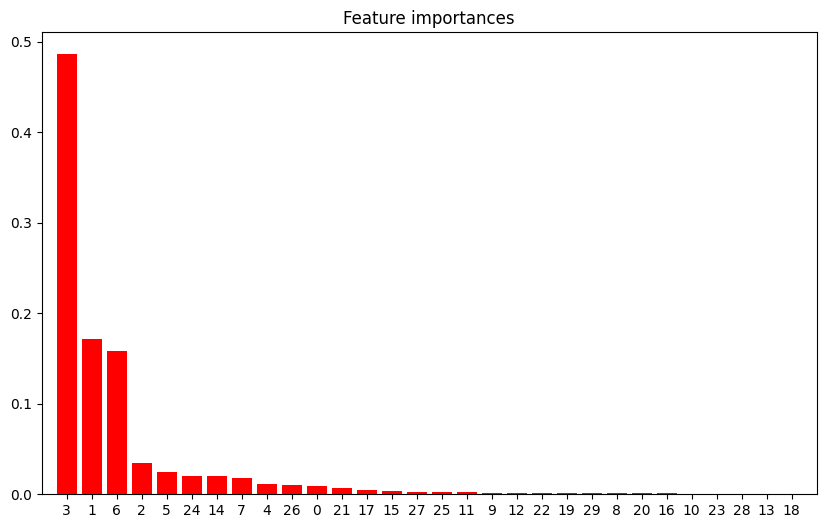

In [45]:
#plot Feature Importances in descend order
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]

# Print
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
